## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


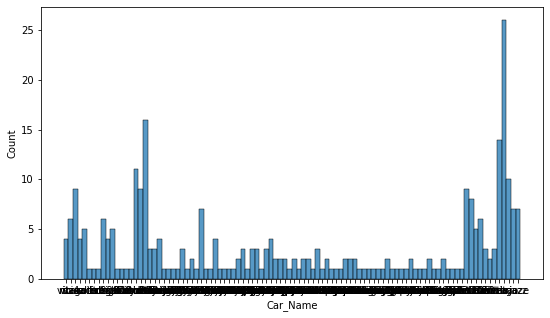

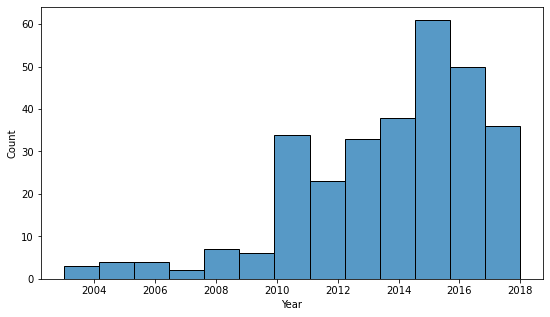

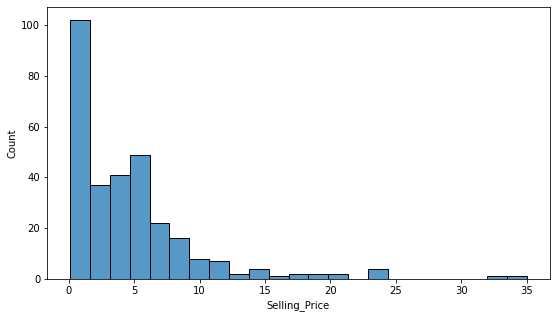

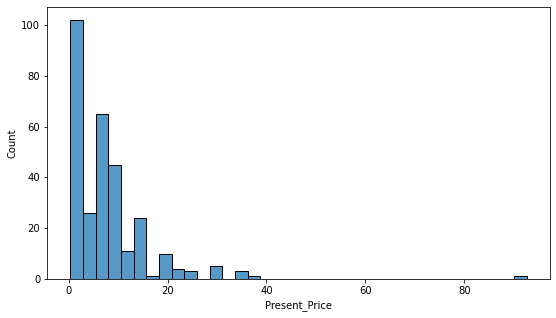

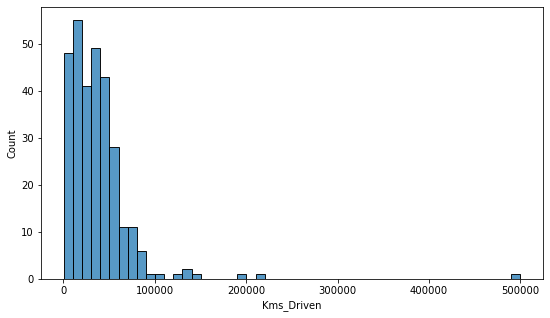

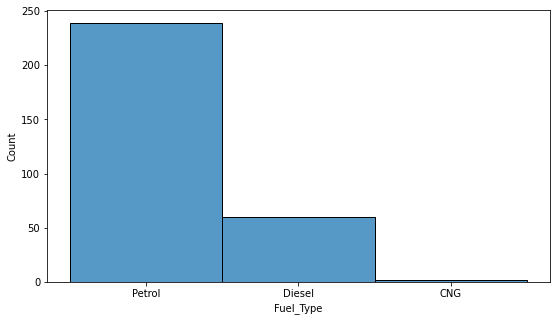

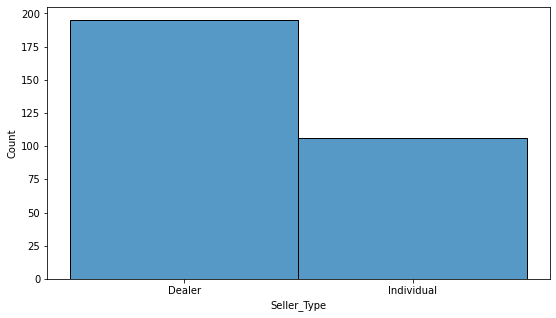

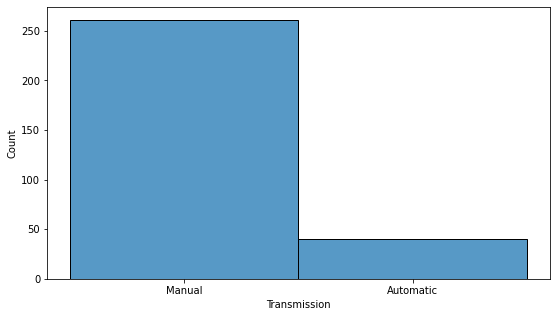

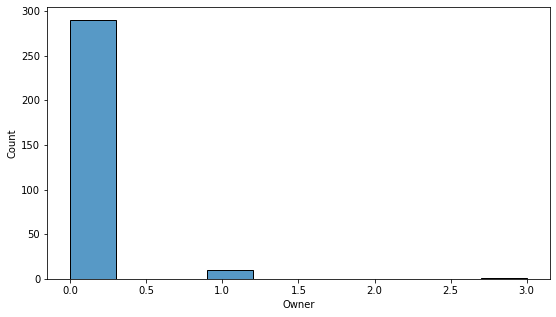

In [7]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

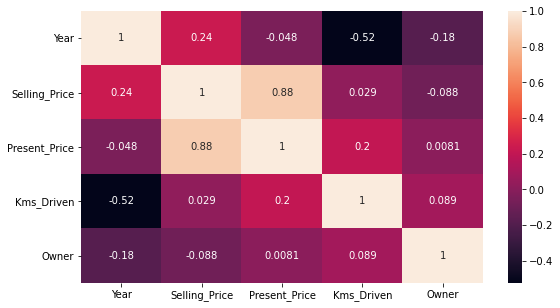

In [8]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df["vehicle_age"]=2021-df.Year

In [11]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
innova                        9
i20                           9
ciaz                          9
grand i10                     8
jazz                          7
Royal Enfield Classic 350     7
amaze                         7
ertiga                        6
sx4                           6
eon                           6
alto k10                      5
i10                           5
swift                         5
Royal Enfield Thunder 350     4
dzire                         4
etios liva                    4
Bajaj Pulsar 150              4
ritz                          4
wagon r                       4
TVS Apache RTR 160            3
etios g                       3
xcent                         3
Honda CB Hornet 160R          3
Royal Enfield Thunder 500     3
Bajaj Avenger 220             3
Bajaj Pulsar NS 200           3
etios cr

In [12]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [13]:
df=pd.get_dummies(df, drop_first=True)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


## Train test split

In [15]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [18]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

## Adaboost Regressor

In [19]:
from sklearn.ensemble import AdaBoostRegressor

In [20]:
model = AdaBoostRegressor(random_state=101, n_estimators=50)

In [21]:
model.fit(X_train, y_train)

AdaBoostRegressor(random_state=101)

In [22]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [23]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.973615,0.956570
mae,0.655981,0.816543
mse,0.671082,1.165686
rmse,0.819196,1.079669


In [24]:
from sklearn.model_selection import cross_validate, cross_val_score
model = AdaBoostRegressor(random_state=101, n_estimators=50)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.841505
test_neg_mean_absolute_error       -1.086173
test_neg_mean_squared_error        -4.732749
test_neg_root_mean_squared_error   -1.867783
dtype: float64

In [25]:
model = AdaBoostRegressor(random_state=101, n_estimators=3)
model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=3, random_state=101)

In [26]:
from sklearn.tree import plot_tree

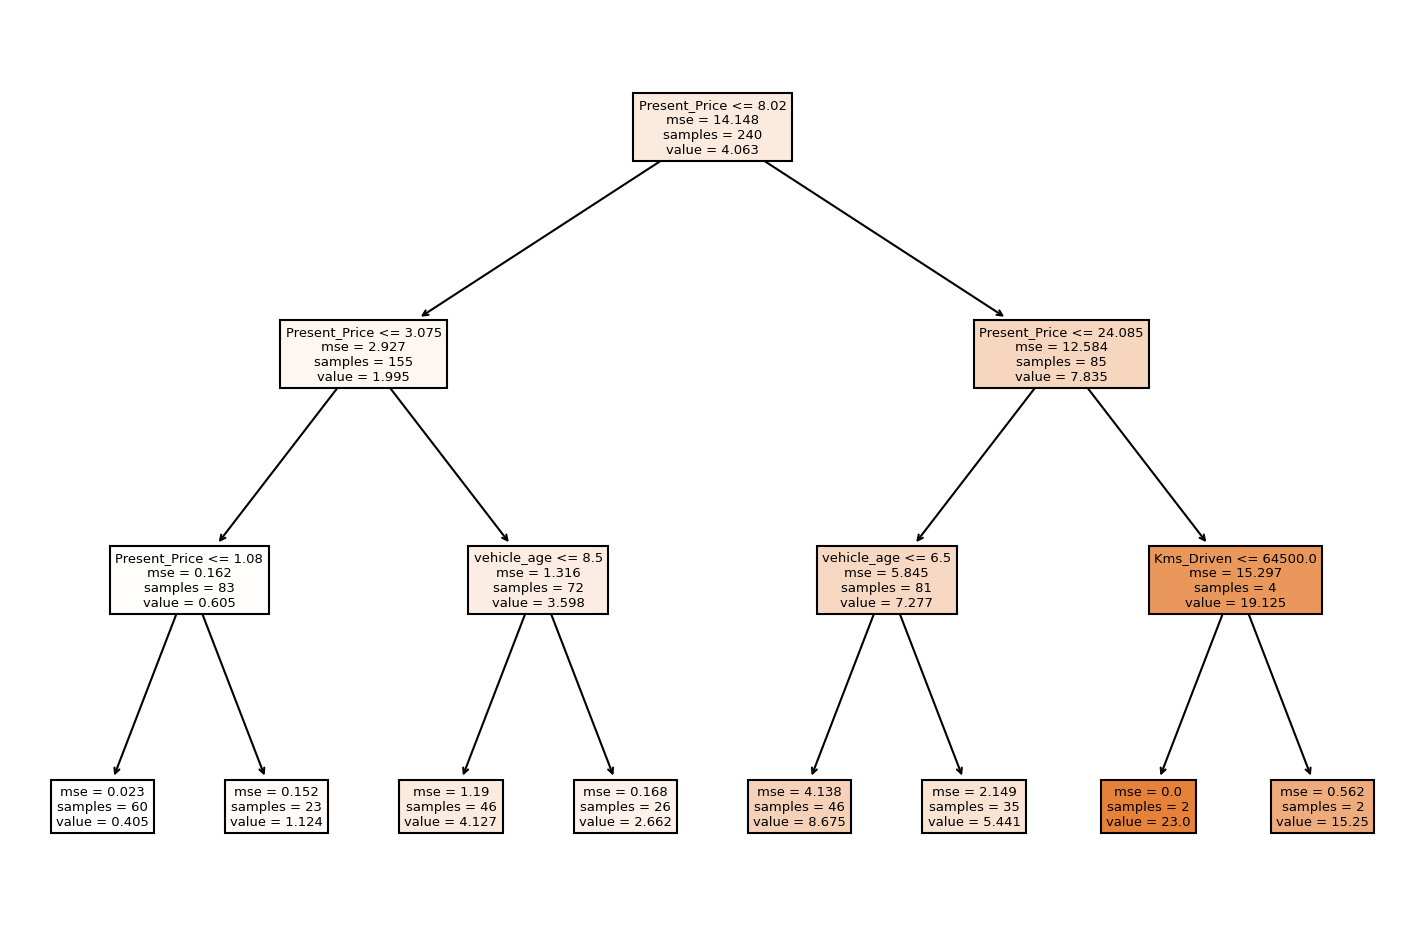

In [27]:
features = list(X.columns)
#targets = df["Clicked on Ad"].astype("str")
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns);

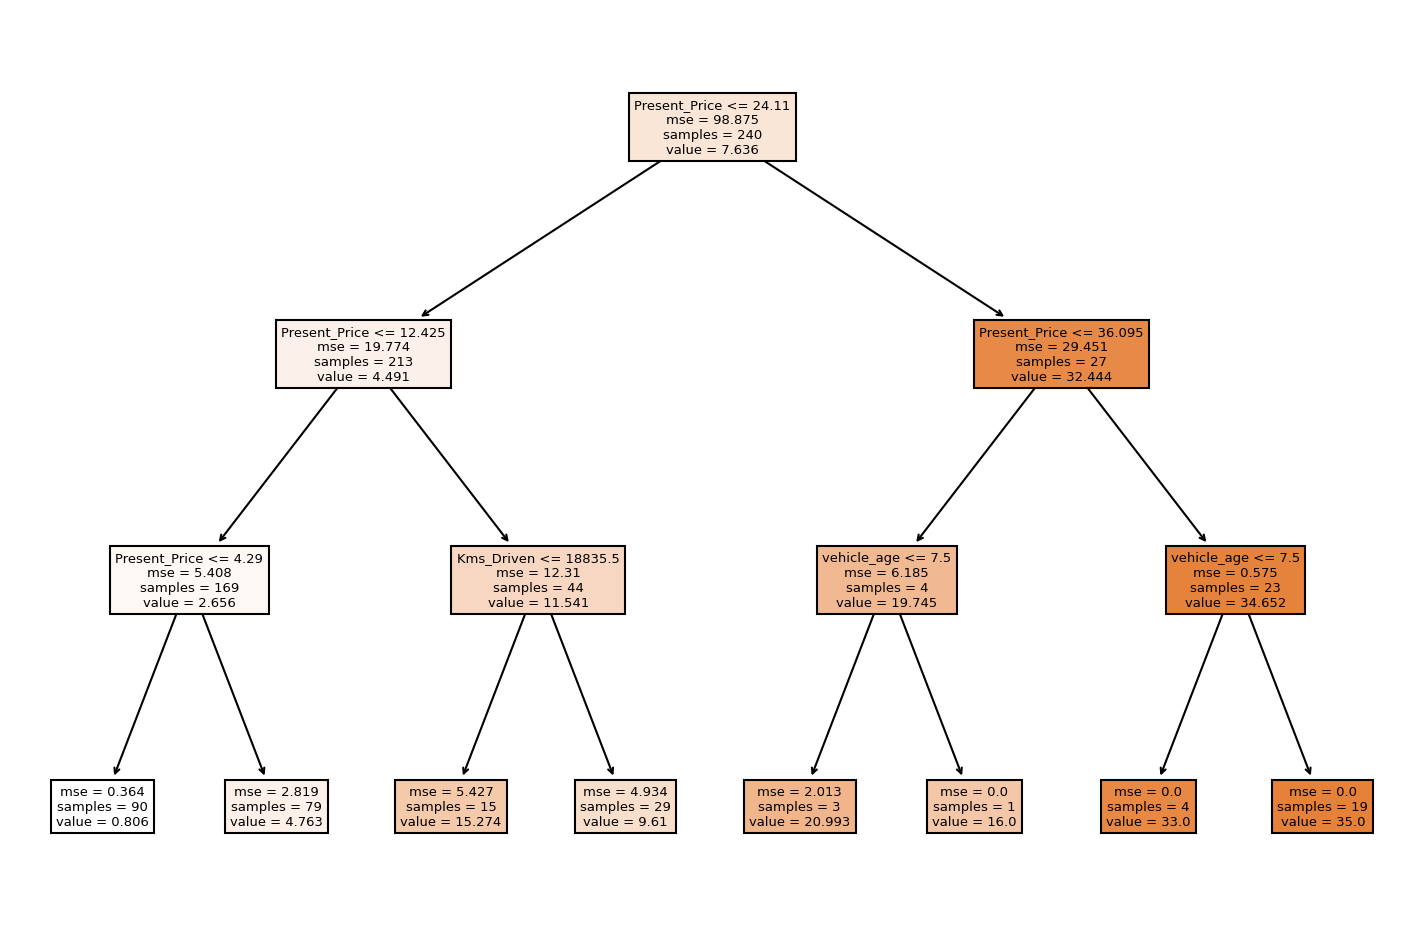

In [28]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[1], filled=True, feature_names=X.columns);

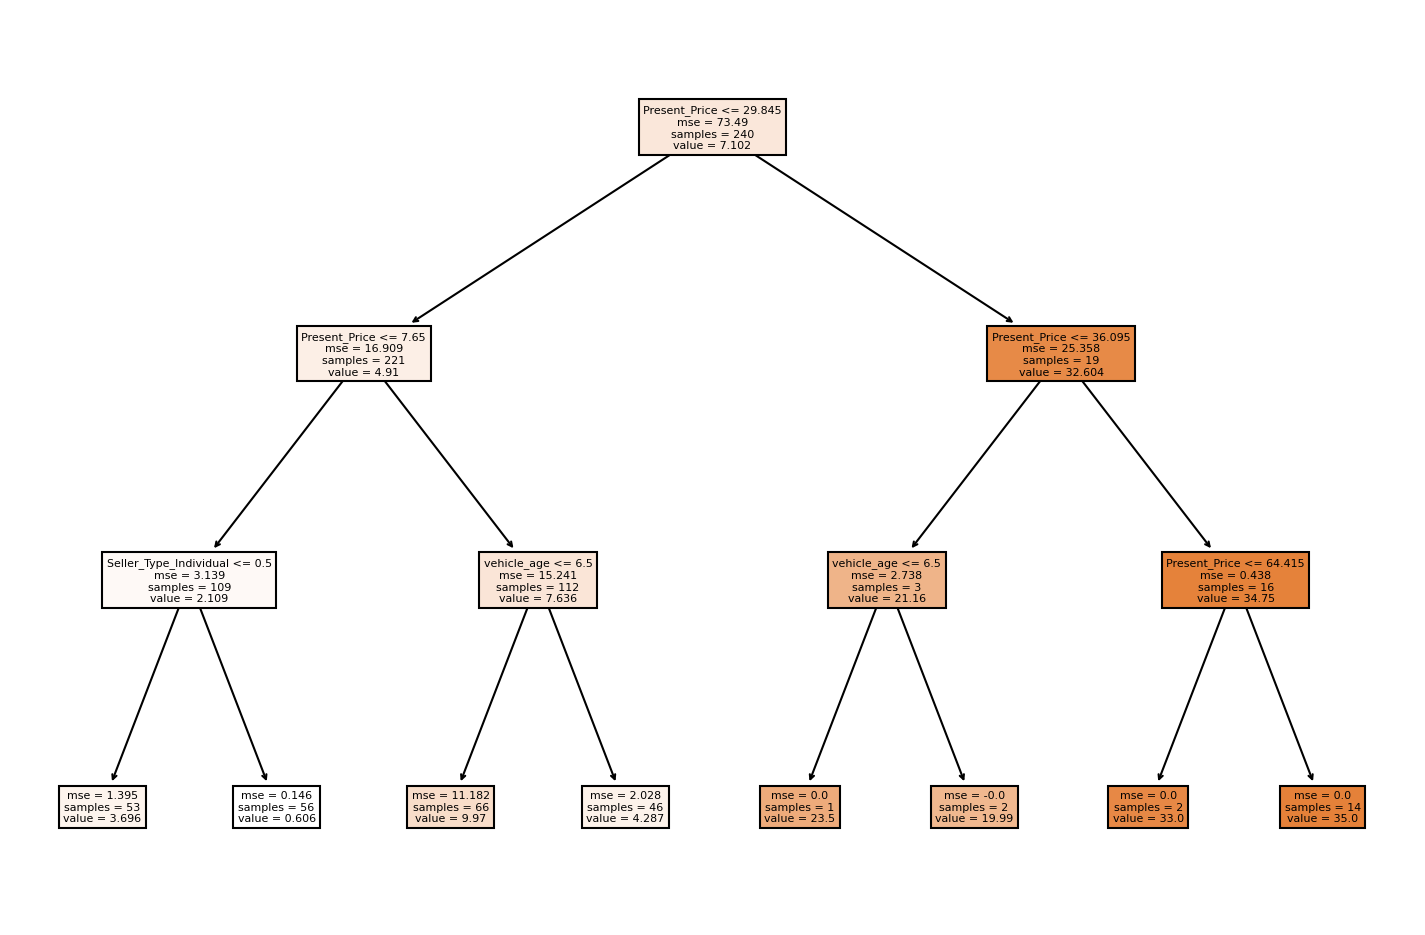

In [29]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[2], filled=True, feature_names=X.columns);

In [30]:
y_pred

array([ 8.20384615,  8.25226415,  4.68487805,  5.13846154,  2.88714286,
       10.27149425,  9.22777778,  1.02519231, 15.25      ,  5.13846154,
        6.27625   ,  7.25580247,  4.18461538,  4.7404    ,  1.02519231,
        3.69622642,  6.154     ,  1.02519231,  6.154     ,  1.02519231,
        5.2875    , 22.52045455, 18.9925    ,  1.23928571,  3.6375    ,
        5.243     ,  5.78      ,  7.56164706,  5.78      ,  5.2875    ,
        4.93766234, 10.27149425,  5.13846154,  1.02519231,  1.02519231,
        5.58133333,  6.91103448,  5.243     ,  1.4625    ,  2.53666667,
        1.02519231,  5.243     , 15.29214286,  0.953     ,  1.23928571,
        5.243     ,  1.02519231,  7.80887097,  3.69622642,  5.243     ,
        4.93766234, 22.398     ,  3.9668    ,  1.4625    ,  0.953     ,
        1.02519231,  2.88714286,  1.02519231,  1.02519231,  1.02519231,
        1.02519231])

In [31]:
np.array(y_test)

array([ 9.25,  9.65,  3.65,  6.  ,  2.9 ,  8.25,  6.25,  0.6 , 14.9 ,
        5.5 ,  5.5 ,  6.5 ,  3.45,  3.49,  0.45,  3.5 ,  7.05,  0.35,
        6.95,  0.4 ,  3.8 , 23.  , 18.75,  1.  ,  1.95,  4.5 ,  4.5 ,
        9.1 ,  5.8 ,  4.35,  5.25,  9.7 ,  5.4 ,  0.2 ,  0.38,  6.15,
        7.75,  4.9 ,  1.05,  1.35,  0.75,  4.8 , 19.75,  0.17,  1.11,
        4.75,  0.2 ,  8.35,  2.9 ,  4.5 ,  5.15, 20.75,  2.25,  1.1 ,
        0.35,  0.15,  3.  ,  0.3 ,  0.2 ,  0.75,  0.45])

## Gridsearch for Adaboosting

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {"n_estimators":[50, 100, 200, 300],
              "learning_rate":[0.1, 0.8, 1]
            }

In [34]:
model = AdaBoostRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [35]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.8, 1],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [36]:
grid_model.best_estimator_

AdaBoostRegressor(learning_rate=0.8, n_estimators=200, random_state=101)

In [37]:
grid_model.best_index_

6

In [38]:
pd.DataFrame(grid_model.cv_results_).loc[6]

mean_fit_time                                             0.362024
std_fit_time                                              0.128565
mean_score_time                                          0.0234415
std_score_time                                            0.007813
param_learning_rate                                            0.8
param_n_estimators                                             200
params                 {'learning_rate': 0.8, 'n_estimators': 200}
split0_test_score                                         -1.22325
split1_test_score                                        -0.997361
split2_test_score                                         -1.67314
split3_test_score                                         -1.56252
split4_test_score                                         -3.38802
split5_test_score                                        -0.971453
split6_test_score                                         -2.69396
split7_test_score                                        -0.92

In [39]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [40]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.966169,0.938707
mae,0.801605,1.013490
mse,0.860469,1.645159
rmse,0.927615,1.282638


## Cross Validate

In [41]:
model = AdaBoostRegressor(random_state=101,n_estimators=200, learning_rate=0.8)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.851850
test_neg_mean_absolute_error       -1.088165
test_neg_mean_squared_error        -4.321304
test_neg_root_mean_squared_error   -1.807705
dtype: float64

## Feature importance

In [42]:
model = AdaBoostRegressor(random_state=101,n_estimators=200, learning_rate=0.8)
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.8, n_estimators=200, random_state=101)

In [43]:
model.feature_importances_

array([0.75992016, 0.05040179, 0.00341982, 0.11132163, 0.04848095,
       0.01163938, 0.01039335, 0.00442292])

In [44]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])
imp_feats

,Importance
Present_Price,0.759920
Kms_Driven,0.050402
Owner,0.003420
vehicle_age,0.111322
Fuel_Type_Diesel,0.048481
Fuel_Type_Petrol,0.011639
Seller_Type_Individual,0.010393
Transmission_Manual,0.004423


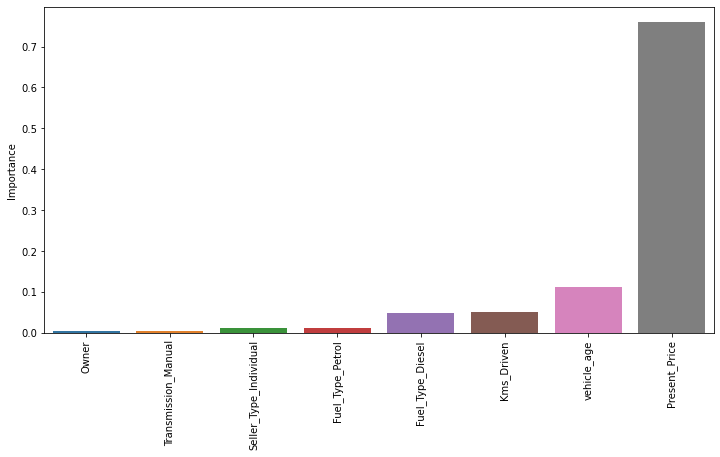

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')

plt.xticks(rotation=90);

## Gradient Boosting Regressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
model = GradientBoostingRegressor(random_state=101)

In [48]:
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

In [49]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.996514,0.961752
mae,0.218627,0.626406
mse,0.088669,1.026618
rmse,0.297774,1.013221


In [50]:
model = GradientBoostingRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.884330
test_neg_mean_absolute_error       -0.757290
test_neg_mean_squared_error        -3.574836
test_neg_root_mean_squared_error   -1.590786
dtype: float64

## Gridsearch for Gradientboosting

In [51]:
param_grid = {"n_estimators":[100, 200, 300], "subsample":[0.8, 1], "max_features" : [None, 2, 3, 4],
            "learning_rate": [0.001, 0.01, 0.1, 0.5], 'max_depth':[2,3]}

In [52]:
model = GradientBoostingRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [53]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'max_depth': [2, 3], 'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error')

In [54]:
grid_model.best_estimator_

GradientBoostingRegressor(max_depth=2, max_features=4, n_estimators=300,
                          random_state=101, subsample=1)

In [55]:
grid_model.best_index_

119

In [56]:
pd.DataFrame(grid_model.cv_results_).loc[119]

mean_fit_time                                                   0.164063
std_fit_time                                                  0.00781176
mean_score_time                                               0.00312541
std_score_time                                                0.00625081
param_learning_rate                                                  0.1
param_max_depth                                                        2
param_max_features                                                     4
param_n_estimators                                                   300
param_subsample                                                        1
params                 {'learning_rate': 0.1, 'max_depth': 2, 'max_fe...
split0_test_score                                              -0.749412
split1_test_score                                              -0.832853
split2_test_score                                              -0.791716
split3_test_score                                  

In [57]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [58]:
pd.options.display.float_format = '{:.3f}'.format
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.996,0.951
mae,0.242,0.677
mse,0.112,1.320
rmse,0.334,1.149


In [59]:
model = GradientBoostingRegressor(random_state=101, max_depth=2, max_features=4, n_estimators=300)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.951,-0.586,-0.562,-0.749
1,0.937,-0.602,-0.694,-0.833
2,0.981,-0.545,-0.627,-0.792
3,0.935,-0.519,-0.809,-0.900
4,0.812,-1.083,-6.328,-2.516
5,0.973,-0.462,-0.388,-0.623
6,0.939,-0.886,-3.582,-1.893
7,0.922,-0.521,-0.657,-0.811
8,0.942,-0.510,-0.704,-0.839
9,0.733,-1.397,-13.251,-3.640


In [60]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.913
test_neg_mean_absolute_error       -0.711
test_neg_mean_squared_error        -2.760
test_neg_root_mean_squared_error   -1.359
dtype: float64

## Feature importance

In [61]:
model = GradientBoostingRegressor(random_state=101, max_depth=2, max_features=4, n_estimators=300)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, max_features=4, n_estimators=300,
                          random_state=101)

In [62]:
model.feature_importances_

array([7.11023743e-01, 4.12736086e-02, 1.11034192e-04, 3.90727849e-02,
       7.49183458e-02, 2.11072187e-02, 1.03406640e-01, 9.08662445e-03])

In [63]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])
imp_feats

,Importance
Present_Price,0.711
Kms_Driven,0.041
Owner,0.000
vehicle_age,0.039
Fuel_Type_Diesel,0.075
Fuel_Type_Petrol,0.021
Seller_Type_Individual,0.103
Transmission_Manual,0.009


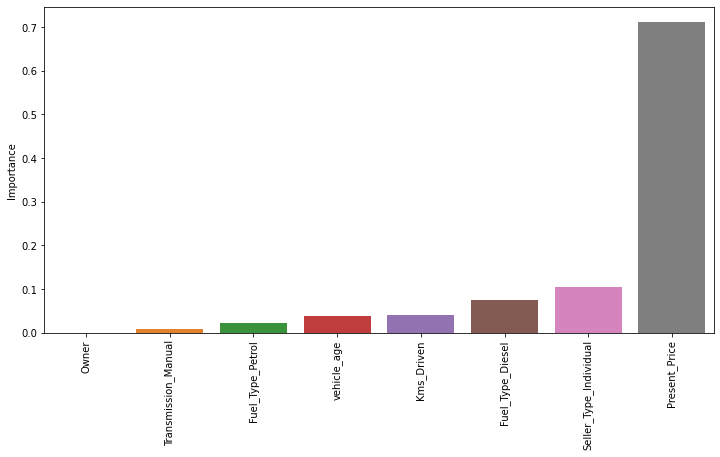

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')

plt.xticks(rotation=90);

## XG Boost Regressor

In [65]:
#!pip install xgboost

In [66]:
from xgboost import XGBRegressor

In [67]:
model = XGBRegressor(random_state=101, silent=True)

In [68]:
model.fit(X_train, y_train)

XGBRegressor(random_state=101, silent=True)

In [69]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.995,0.966
mae,0.266,0.553
mse,0.139,0.922
rmse,0.373,0.960


In [70]:
model = XGBRegressor(random_state=101, silent=True)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.897
test_neg_mean_absolute_error       -0.731
test_neg_mean_squared_error        -2.933
test_neg_root_mean_squared_error   -1.465
dtype: float64

## Gridsearch for XGBoost

In [71]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [72]:
model = XGBRegressor(random_state=101, silent=True)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [73]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=XGBRegressor(random_state=101, silent=True),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [74]:
grid_model.best_estimator_

XGBRegressor(learning_rate=0.2, max_depth=5, random_state=101, silent=True,
             subsample=0.5)

In [75]:
grid_model.best_index_

126

In [76]:
pd.DataFrame(grid_model.cv_results_).loc[126]

mean_fit_time                                                         0.209
std_fit_time                                                          0.029
mean_score_time                                                       0.003
std_score_time                                                        0.004
param_colsample_bytree                                                    1
param_learning_rate                                                   0.200
param_max_depth                                                           5
param_n_estimators                                                      100
param_subsample                                                       0.500
params                    {'colsample_bytree': 1, 'learning_rate': 0.2, ...
split0_test_score                                                    -0.604
split1_test_score                                                    -0.895
split2_test_score                                                    -0.746
split3_test_

In [77]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.999,0.974
mae,0.085,0.531
mse,0.013,0.710
rmse,0.113,0.843


In [78]:
model = XGBRegressor(random_state=101, silent=True,learning_rate=0.2, max_dept=5, subsample=0.5)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.975,-0.394,-0.291,-0.539
1,0.927,-0.638,-0.796,-0.892
2,0.967,-0.651,-1.085,-1.042
3,0.916,-0.534,-1.043,-1.021
4,0.771,-1.167,-7.703,-2.776
5,0.976,-0.375,-0.345,-0.588
6,0.928,-0.863,-4.252,-2.062
7,0.918,-0.519,-0.689,-0.830
8,0.982,-0.320,-0.217,-0.466
9,0.869,-0.855,-6.479,-2.545


In [79]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.923
test_neg_mean_absolute_error       -0.632
test_neg_mean_squared_error        -2.290
test_neg_root_mean_squared_error   -1.276
dtype: float64

## Feature importance

In [80]:
model = XGBRegressor(random_state=101, silent=True,learning_rate=0.2, max_dept=5, subsample=0.5)
model.fit(X_train, y_train)

XGBRegressor(learning_rate=0.2, max_dept=5, random_state=101, silent=True,
             subsample=0.5)

In [81]:
model.feature_importances_

array([0.57294595, 0.02781658, 0.        , 0.17010532, 0.13005188,
       0.01079989, 0.0804313 , 0.00784906], dtype=float32)

In [82]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])
imp_feats

,Importance
Present_Price,0.573
Kms_Driven,0.028
Owner,0.000
vehicle_age,0.170
Fuel_Type_Diesel,0.130
Fuel_Type_Petrol,0.011
Seller_Type_Individual,0.080
Transmission_Manual,0.008


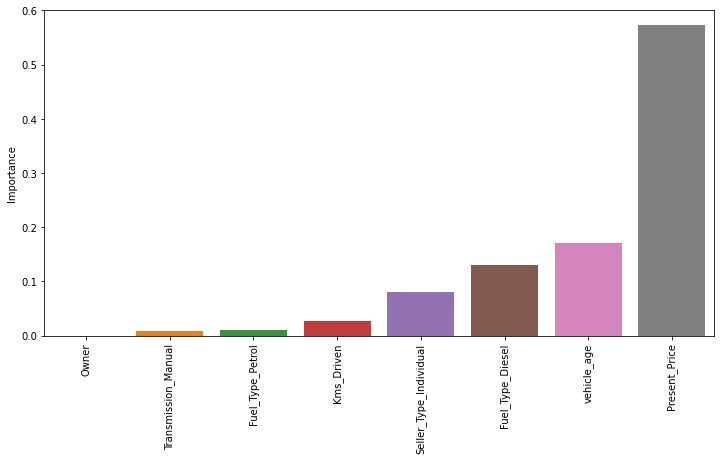

In [83]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')

plt.xticks(rotation=90);

## New model

In [84]:
X_new = df[["vehicle_age",  "Present_Price"]]

In [85]:
X_new.head()

,vehicle_age,Present_Price
0,7,5.590
1,8,9.540
2,4,9.850
3,10,4.150
4,7,6.870


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=5)

In [87]:
model = XGBRegressor(random_state=101, silent=True)

In [88]:
model.fit(X_train, y_train)

XGBRegressor(random_state=101, silent=True)

In [89]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [90]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
R2,0.992,0.948
mae,0.308,0.771
mse,0.213,1.311
rmse,0.461,1.145


In [91]:
model = XGBRegressor(random_state=101, silent=True,learning_rate=0.2, max_dept=5, subsample=0.5)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.903
test_neg_mean_absolute_error       -0.622
test_neg_mean_squared_error        -2.113
test_neg_root_mean_squared_error   -1.193
dtype: float64